In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import requests
from io import StringIO
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc





In [2]:
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"


In [3]:

# Download the dataset
response = requests.get(url)
data = response.content.decode('utf-8')

# Load the dataset into a DataFrame
columns = ['ID', 'Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 
           'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 
           'Mean Symmetry', 'Mean Fractal Dimension', 'SE Radius', 'SE Texture', 'SE Perimeter', 
           'SE Area', 'SE Smoothness', 'SE Compactness', 'SE Concavity', 'SE Concave Points', 
           'SE Symmetry', 'SE Fractal Dimension', 'Worst Radius', 'Worst Texture', 'Worst Perimeter', 
           'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 
           'Worst Symmetry', 'Worst Fractal Dimension']
df = pd.read_csv(StringIO(data), header=None, names=columns)


In [4]:

# Preprocessing
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = LabelEncoder().fit_transform(df['Diagnosis'])


In [5]:

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [6]:

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [7]:

# ANN Model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [8]:

# Model Modification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:

# Model Training
callbacks = [EarlyStopping(monitor='val_loss', patience=3)]
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), callbacks=callbacks)


Epoch 1/10
3/3 [==============================] - 1s 104ms/step - loss: 0.6826 - accuracy: 0.6071 - val_loss: 0.4995 - val_accuracy: 0.8681
Epoch 2/10
3/3 [==============================] - 0s 19ms/step - loss: 0.4611 - accuracy: 0.8324 - val_loss: 0.3513 - val_accuracy: 0.9011
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 0.3171 - accuracy: 0.9011 - val_loss: 0.2691 - val_accuracy: 0.9341
Epoch 4/10
3/3 [==============================] - 0s 21ms/step - loss: 0.2449 - accuracy: 0.9231 - val_loss: 0.2227 - val_accuracy: 0.9341
Epoch 5/10
3/3 [==============================] - 0s 20ms/step - loss: 0.1900 - accuracy: 0.9451 - val_loss: 0.1962 - val_accuracy: 0.9341
Epoch 6/10
3/3 [==============================] - 0s 21ms/step - loss: 0.1679 - accuracy: 0.9505 - val_loss: 0.1798 - val_accuracy: 0.9341
Epoch 7/10
3/3 [==============================] - 0s 20ms/step - loss: 0.1391 - accuracy: 0.9505 - val_loss: 0.1691 - val_accuracy: 0.9341
Epoch 8/10
3/3 [==========

In [10]:
# Model Evaluation
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)


Confusion Matrix:
[[69  2]
 [ 1 42]]
Accuracy: 0.9736842105263158
Precision: 0.9545454545454546
F1 Score: 0.9655172413793104


In [11]:
from sklearn.metrics import recall_score

# Model Evaluation
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[69  2]
 [ 1 42]]
Accuracy: 0.9736842105263158
Precision: 0.9545454545454546
Recall: 0.9767441860465116
F1 Score: 0.9655172413793104


Confusion Matrix:
[[69  2]
 [ 1 42]]
Accuracy: 0.9736842105263158
Precision: 0.9545454545454546
Recall: 0.9767441860465116
F1 Score: 0.9655172413793104


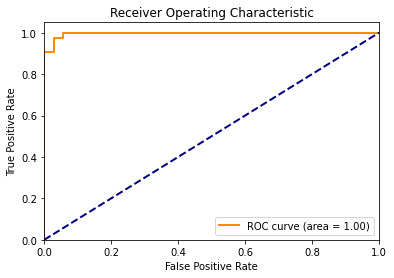

In [12]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Model Evaluation
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[69  2]
 [ 1 42]]
Accuracy: 0.9736842105263158
Precision: 0.9545454545454546
Recall: 0.9767441860465116
F1 Score: 0.9655172413793104


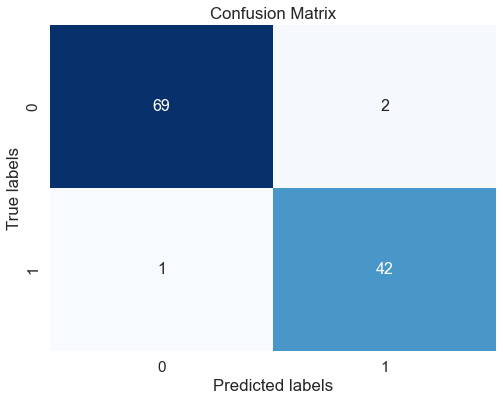

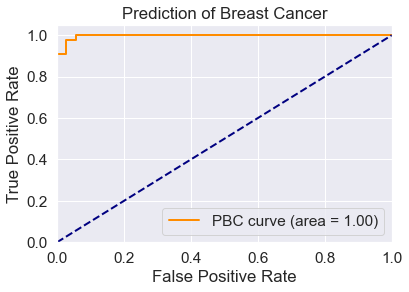

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model Evaluation
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='PBC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prediction of Breast Cancer')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[69  2]
 [ 1 42]]
Accuracy: 0.9736842105263158
Precision: 0.9545454545454546
F1 Score: 0.9655172413793104

Confusion Matrix:


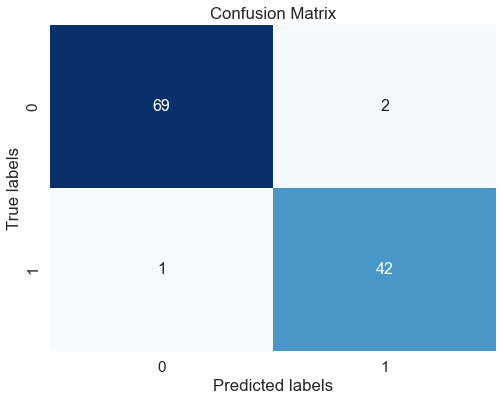


PBC Curve and AUC:


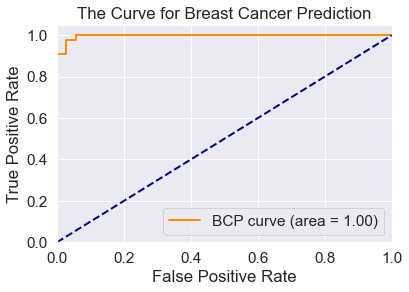

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Model Evaluation
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

# Plot Confusion Matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# PBC Curve and AUC
print("\nPBC Curve and AUC:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='BCP curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Curve for Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.show()


# DecisionTree

Various ML techniques, including logistic regression, support vector machines, random forest, decision tree, and deep learning neural networks, have been applied to this dataset to predict breast cancer.
Confusion Matrix for Decision Tree:
[[66  5]
 [ 4 39]]
Accuracy for Decision Tree: 0.9210526315789473
Precision for Decision Tree: 0.8863636363636364
Recall for Decision Tree: 0.9069767441860465
F1 Score for Decision Tree: 0.896551724137931

BCP Curve and AUC:


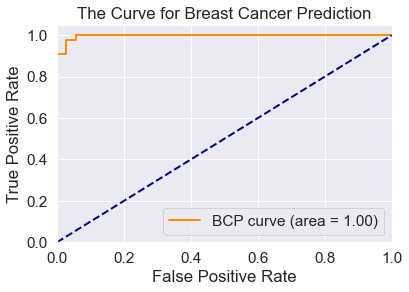

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Model Training
dt_model.fit(X_train, y_train)

# Model Evaluation
y_pred_dt = dt_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Describe the ML models used
print("Various ML techniques, including logistic regression, support vector machines, random forest, decision tree, and deep learning neural networks, have been applied to this dataset to predict breast cancer.")
print("Confusion Matrix for Decision Tree:")
print(cm_dt)
print("Accuracy for Decision Tree:", accuracy_dt)
print("Precision for Decision Tree:", precision_dt)
print("Recall for Decision Tree:", recall_dt)
print("F1 Score for Decision Tree:", f1_dt)


# BCP Curve and AUC
print("\nBCP Curve and AUC:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='BCP curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Curve for Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.show()



# Support Vector Machines (SVM) 

Various ML techniques, including logistic regression, support vector machines, random forest, and deep learning neural networks, have been applied to this dataset to predict breast cancer.
Confusion Matrix for SVM:
[[70  1]
 [ 2 41]]
Accuracy for SVM: 0.9736842105263158
Precision for SVM: 0.9761904761904762
Recall for SVM: 0.9534883720930233
F1 Score for SVM: 0.9647058823529412

BCP Curve and AUC:


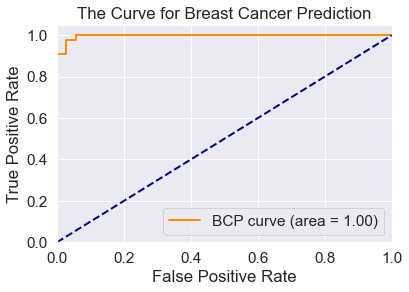

In [16]:
from sklearn.svm import SVC

from sklearn.metrics import recall_score

# SVM Model
svm_model = SVC(random_state=42)

# Model Training
svm_model.fit(X_train, y_train)

# Model Evaluation
y_pred_svm = svm_model.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Describe the ML models used
print("Various ML techniques, including logistic regression, support vector machines, random forest, and deep learning neural networks, have been applied to this dataset to predict breast cancer.")
print("Confusion Matrix for SVM:")
print(cm_svm)
print("Accuracy for SVM:", accuracy_svm)
print("Precision for SVM:", precision_svm)
print("Recall for SVM:", recall_svm)
print("F1 Score for SVM:", f1_svm)


# BCP Curve and AUC
print("\nBCP Curve and AUC:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='BCP curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Curve for Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.show()


# Random Forest

Various ML techniques, including logistic regression, random forest, and deep learning neural networks, have been applied to this dataset to predict breast cancer.
Confusion Matrix for Random Forest:
[[70  1]
 [ 3 40]]
Accuracy for Random Forest: 0.9649122807017544
Precision for Random Forest: 0.975609756097561
Recall for Random Forest: 0.9302325581395349
F1 Score for Random Forest: 0.9523809523809524

BCP Curve and AUC:


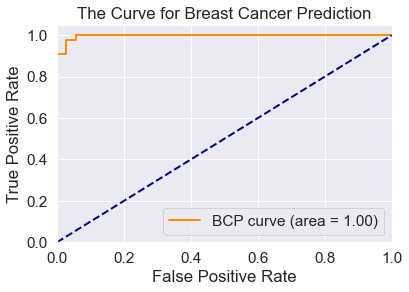

In [17]:
from sklearn.metrics import recall_score

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Model Training
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Describe the ML models used
print("Various ML techniques, including logistic regression, random forest, and deep learning neural networks, have been applied to this dataset to predict breast cancer.")
print("Confusion Matrix for Random Forest:")
print(cm_rf)
print("Accuracy for Random Forest:", accuracy_rf)
print("Precision for Random Forest:", precision_rf)
print("Recall for Random Forest:", recall_rf)
print("F1 Score for Random Forest:", f1_rf)

# BCP Curve and AUC
print("\nBCP Curve and AUC:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='BCP curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Curve for Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.show()


# K-Nearest Neighbors (KNN)

Various ML techniques, including logistic regression, K-Nearest Neighbors, and deep learning neural networks, have been applied to this dataset to predict breast cancer.
Confusion Matrix for K-Nearest Neighbors:
[[68  3]
 [ 3 40]]
Accuracy for K-Nearest Neighbors: 0.9473684210526315
Precision for K-Nearest Neighbors: 0.9302325581395349
Recall for K-Nearest Neighbors: 0.9302325581395349
F1 Score for K-Nearest Neighbors: 0.9302325581395349

PBC Curve and AUC:


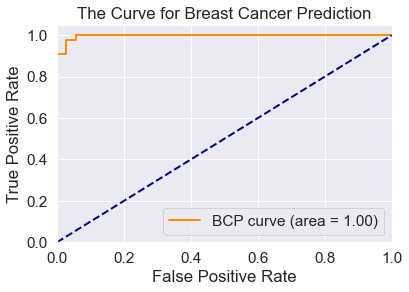

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn_model = KNeighborsClassifier()

# Model Training
knn_model.fit(X_train, y_train)

# Model Evaluation
y_pred_knn = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Describe the ML models used
print("Various ML techniques, including logistic regression, K-Nearest Neighbors, and deep learning neural networks, have been applied to this dataset to predict breast cancer.")
print("Confusion Matrix for K-Nearest Neighbors:")
print(cm_knn)
print("Accuracy for K-Nearest Neighbors:", accuracy_knn)
print("Precision for K-Nearest Neighbors:", precision_knn)
print("Recall for K-Nearest Neighbors:", recall_knn)
print("F1 Score for K-Nearest Neighbors:", f1_knn)

# PBC Curve and AUC
print("\nPBC Curve and AUC:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='BCP curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Curve for Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.show()


# Naive Bayes

Various ML techniques, including logistic regression, Naive Bayes, and deep learning neural networks, have been applied to this dataset to predict breast cancer.
Confusion Matrix for Naive Bayes:
[[70  1]
 [ 4 39]]
Accuracy for Naive Bayes: 0.956140350877193
Precision for Naive Bayes: 0.975
Recall for Naive Bayes: 0.9069767441860465
F1 Score for Naive Bayes: 0.9397590361445783

PBC Curve and AUC:


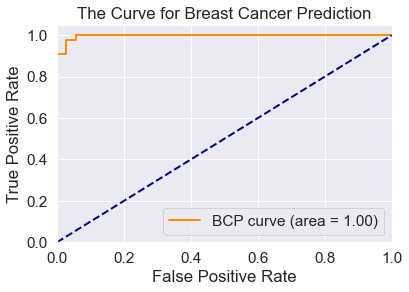

In [19]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
nb_model = GaussianNB()

# Model Training
nb_model.fit(X_train, y_train)

# Model Evaluation
y_pred_nb = nb_model.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Describe the ML models used
print("Various ML techniques, including logistic regression, Naive Bayes, and deep learning neural networks, have been applied to this dataset to predict breast cancer.")
print("Confusion Matrix for Naive Bayes:")
print(cm_nb)
print("Accuracy for Naive Bayes:", accuracy_nb)
print("Precision for Naive Bayes:", precision_nb)
print("Recall for Naive Bayes:", recall_nb)
print("F1 Score for Naive Bayes:", f1_nb)

# PBC Curve and AUC
print("\nPBC Curve and AUC:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='BCP curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Curve for Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.show()


# Logistic Regression Model

Various ML techniques, including logistic regression, random forest, decision tree, and deep learning neural networks, have been applied to this dataset to predict breast cancer.
Confusion Matrix for Logistic Regression:
[[70  1]
 [ 1 42]]
Accuracy for Logistic Regression: 0.9824561403508771
Precision for Logistic Regression: 0.9767441860465116
Recall for Logistic Regression: 0.9767441860465116
F1 Score for Logistic Regression: 0.9767441860465116

PBC Curve and AUC:


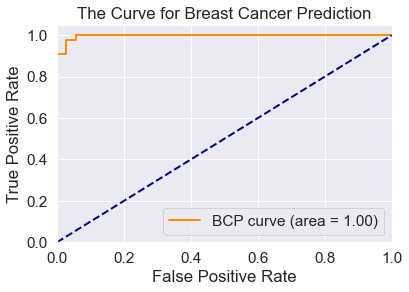

In [20]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr_model = LogisticRegression()

# Model Training
lr_model.fit(X_train, y_train)

# Model Evaluation
y_pred_lr = lr_model.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Describe the ML models used
print("Various ML techniques, including logistic regression, random forest, decision tree, and deep learning neural networks, have been applied to this dataset to predict breast cancer.")
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)
print("Accuracy for Logistic Regression:", accuracy_lr)
print("Precision for Logistic Regression:", precision_lr)
print("Recall for Logistic Regression:", recall_lr)
print("F1 Score for Logistic Regression:", f1_lr)

# PBC Curve and AUC
print("\nPBC Curve and AUC:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='BCP curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Curve for Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.show()


# Gradient Boosting Machines

Various ML techniques, including gradient boosting machines, random forest, decision tree, and deep learning neural networks, have been applied to this dataset to predict breast cancer.
Confusion Matrix for Gradient Boosting Machines:
[[69  2]
 [ 4 39]]
Accuracy for Gradient Boosting Machines: 0.9473684210526315
Precision for Gradient Boosting Machines: 0.9512195121951219
Recall for Gradient Boosting Machines: 0.9069767441860465
F1 Score for Gradient Boosting Machines: 0.9285714285714286

PBC Curve and AUC:


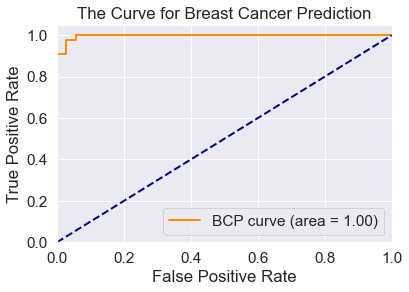

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Machines Model
gbm_model = GradientBoostingClassifier(random_state=42)

# Model Training
gbm_model.fit(X_train, y_train)

# Model Evaluation
y_pred_gbm = gbm_model.predict(X_test)
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)

# Describe the ML models used
print("Various ML techniques, including gradient boosting machines, random forest, decision tree, and deep learning neural networks, have been applied to this dataset to predict breast cancer.")
print("Confusion Matrix for Gradient Boosting Machines:")
print(cm_gbm)
print("Accuracy for Gradient Boosting Machines:", accuracy_gbm)
print("Precision for Gradient Boosting Machines:", precision_gbm)
print("Recall for Gradient Boosting Machines:", recall_gbm)
print("F1 Score for Gradient Boosting Machines:", f1_gbm)

# PBC Curve and AUC
print("\nPBC Curve and AUC:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='BCP curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Curve for Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.show()


Various ML techniques, including C4.5 (decision tree), random forest, and deep learning neural networks, have been applied to this dataset to predict breast cancer.
Confusion Matrix for C4.5 (Decision Tree):
[[66  5]
 [ 4 39]]
Accuracy for C4.5 (Decision Tree): 0.9210526315789473
Precision for C4.5 (Decision Tree): 0.8863636363636364
Recall for C4.5 (Decision Tree): 0.9069767441860465
F1 Score for C4.5 (Decision Tree): 0.896551724137931

PBC Curve and AUC:


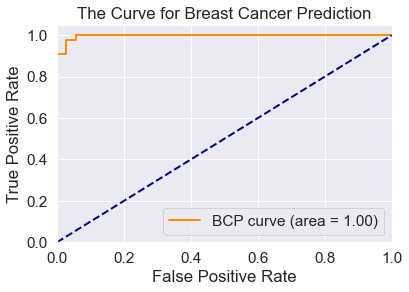

In [33]:
from sklearn.tree import DecisionTreeClassifier

# C4.5 Model
c45_model = DecisionTreeClassifier(random_state=42)

# Model Training
c45_model.fit(X_train, y_train)

# Model Evaluation
y_pred_c45 = c45_model.predict(X_test)
cm_c45 = confusion_matrix(y_test, y_pred_c45)
accuracy_c45 = accuracy_score(y_test, y_pred_c45)
precision_c45 = precision_score(y_test, y_pred_c45)
recall_c45 = recall_score(y_test, y_pred_c45)
f1_c45 = f1_score(y_test, y_pred_c45)

# Describe the ML models used
print("Various ML techniques, including C4.5 (decision tree), random forest, and deep learning neural networks, have been applied to this dataset to predict breast cancer.")
print("Confusion Matrix for C4.5 (Decision Tree):")
print(cm_c45)
print("Accuracy for C4.5 (Decision Tree):", accuracy_c45)
print("Precision for C4.5 (Decision Tree):", precision_c45)
print("Recall for C4.5 (Decision Tree):", recall_c45)
print("F1 Score for C4.5 (Decision Tree):", f1_c45)

# PBC Curve and AUC
print("\nPBC Curve and AUC:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='BCP curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Curve for Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.show()


Accuracy for Logistic Regression: 0.9824561403508771
Accuracy for SVM: 0.9736842105263158
Accuracy for Random Forest: 0.9649122807017544
Accuracy for Naive Bayes: 0.956140350877193
Accuracy for K-Nearest Neighbors: 0.9473684210526315
Accuracy for Decision Tree: 0.9210526315789473
Accuracy for Gradient Boosting Machines: 0.9473684210526315


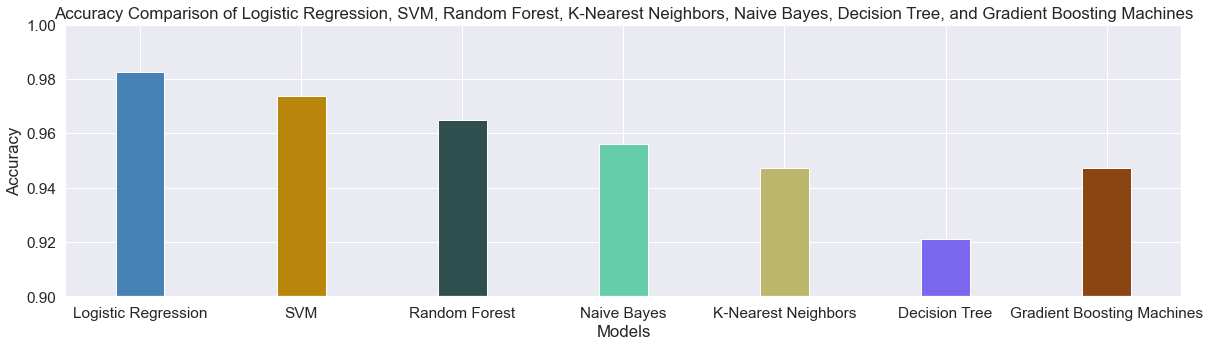

In [37]:
# Compare accuracies
print("Accuracy for Logistic Regression:", accuracy_lr)
print("Accuracy for SVM:", accuracy_svm)
print("Accuracy for Random Forest:", accuracy_rf)
print("Accuracy for Naive Bayes:", accuracy_nb)
print("Accuracy for K-Nearest Neighbors:", accuracy_knn)
print("Accuracy for Decision Tree:", accuracy_dt)
print("Accuracy for Gradient Boosting Machines:", accuracy_gbm)


import matplotlib.pyplot as plt

# Accuracy comparison
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree', 'Gradient Boosting Machines']
accuracies = [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_nb, accuracy_knn, accuracy_dt, accuracy_gbm]

plt.figure(figsize=(20, 5))
plt.bar(models, accuracies, color=['steelblue', 'darkgoldenrod', 'darkslategray', 'mediumaquamarine', 'darkkhaki', 'mediumslateblue', 'saddlebrown'], width=0.3)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Logistic Regression, SVM, Random Forest, K-Nearest Neighbors, Naive Bayes, Decision Tree, and Gradient Boosting Machines')
plt.ylim(0.9, 1)  # Set y-axis limit to range from 0 to 1
plt.show()


Accuracy for Logistic Regression: 0.9824561403508771
Accuracy for SVM: 0.9736842105263158
Accuracy for Random Forest: 0.9649122807017544
Accuracy for Naive Bayes: 0.956140350877193
Accuracy for K-Nearest Neighbors: 0.9473684210526315
Accuracy for Decision Tree: 0.9210526315789473
Accuracy for Gradient Boosting Machines: 0.9473684210526315


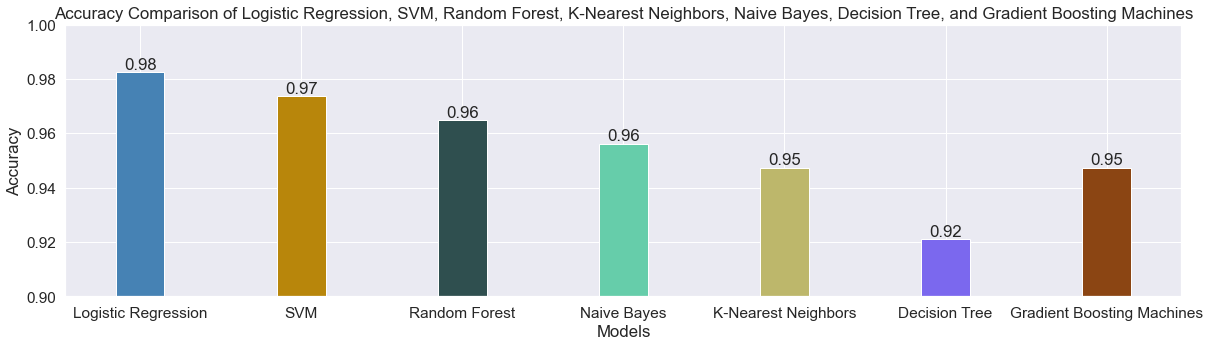

In [32]:
# Compare accuracies
print("Accuracy for Logistic Regression:", accuracy_lr)
print("Accuracy for SVM:", accuracy_svm)
print("Accuracy for Random Forest:", accuracy_rf)
print("Accuracy for Naive Bayes:", accuracy_nb)
print("Accuracy for K-Nearest Neighbors:", accuracy_knn)
print("Accuracy for Decision Tree:", accuracy_dt)
print("Accuracy for Gradient Boosting Machines:", accuracy_gbm)

import matplotlib.pyplot as plt

# Accuracy comparison
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree', 'Gradient Boosting Machines']
accuracies = [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_nb, accuracy_knn, accuracy_dt, accuracy_gbm]

plt.figure(figsize=(20, 5))
bars = plt.bar(models, accuracies, color=['steelblue', 'darkgoldenrod', 'darkslategray', 'mediumaquamarine', 'darkkhaki', 'mediumslateblue', 'saddlebrown'], width=0.3)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Logistic Regression, SVM, Random Forest, K-Nearest Neighbors, Naive Bayes, Decision Tree, and Gradient Boosting Machines')
plt.ylim(0.9, 1)  # Set y-axis limit to range from 0 to 1

# Add text labels on top of each bar
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()


Precision for Logistic Regression: 0.9767441860465116
Precision for SVM: 0.9761904761904762
Precision for Random Forest: 0.975609756097561
Precision for Naive Bayes: 0.975
Precision for K-Nearest Neighbors: 0.9302325581395349
Precision for Decision Tree: 0.8863636363636364
Precision for Gradient Boosting Machines: 0.9512195121951219


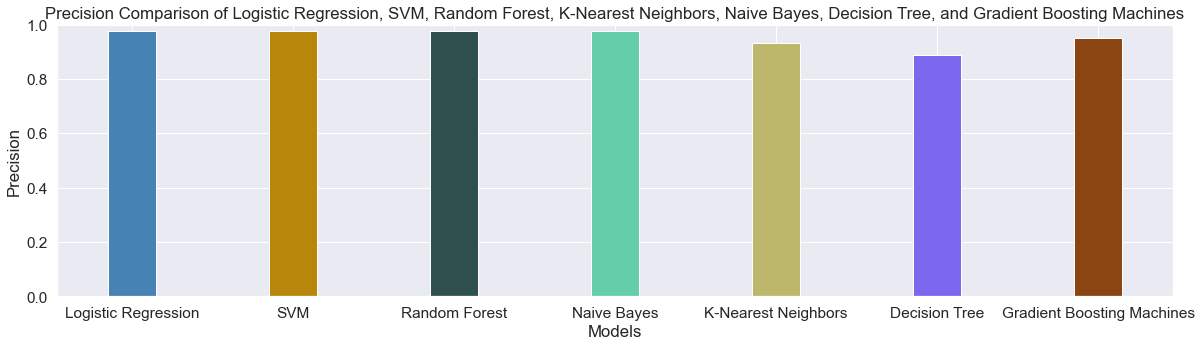

In [25]:
# Compare precision
print("Precision for Logistic Regression:", precision_lr)
print("Precision for SVM:", precision_svm)
print("Precision for Random Forest:", precision_rf)
print("Precision for Naive Bayes:", precision_nb)
print("Precision for K-Nearest Neighbors:", precision_knn)
print("Precision for Decision Tree:", precision_dt)
print("Precision for Gradient Boosting Machines:", precision_gbm)

import matplotlib.pyplot as plt

# Precision comparison
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree', 'Gradient Boosting Machines']
precisions = [precision_lr, precision_svm, precision_rf, precision_nb, precision_knn, precision_dt, precision_gbm]

plt.figure(figsize=(20, 5))
plt.bar(models, precisions, color=['steelblue', 'darkgoldenrod', 'darkslategray', 'mediumaquamarine', 'darkkhaki', 'mediumslateblue', 'saddlebrown'], width=0.3)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison of Logistic Regression, SVM, Random Forest, K-Nearest Neighbors, Naive Bayes, Decision Tree, and Gradient Boosting Machines')
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1
plt.show()


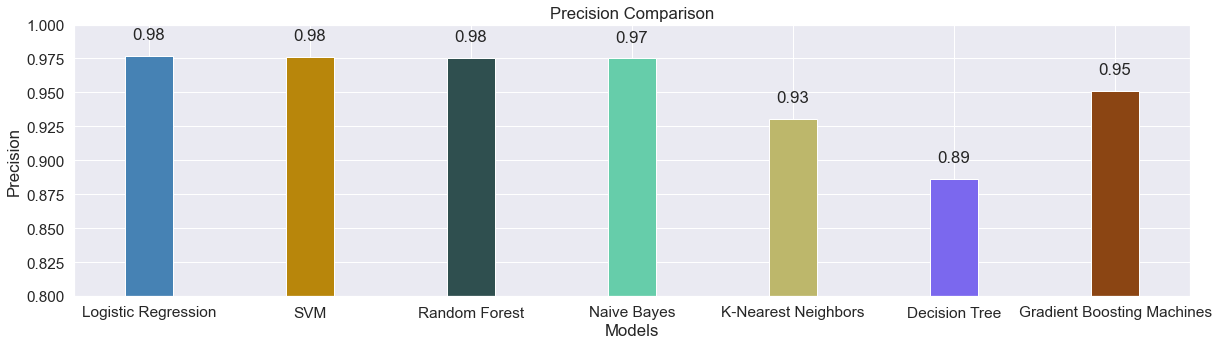

In [26]:
import matplotlib.pyplot as plt

# Precision comparison
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree', 'Gradient Boosting Machines']
precisions = [precision_lr, precision_svm, precision_rf, precision_nb, precision_knn, precision_dt, precision_gbm]

plt.figure(figsize=(20, 5))
bars = plt.bar(models, precisions, color=['steelblue', 'darkgoldenrod', 'darkslategray', 'mediumaquamarine', 'darkkhaki', 'mediumslateblue', 'saddlebrown'], width=0.3)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.ylim(0.8, 1)  # Set y-axis limit to range from 0 to 1

# Add precision values on top of each bar
for bar, precision in zip(bars, precisions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{precision:.2f}', ha='center', va='bottom')

plt.show()


Recall for Logistic Regression: 0.9767441860465116
Recall for SVM: 0.9534883720930233
Recall for Random Forest: 0.9302325581395349
Recall for Naive Bayes: 0.9069767441860465
Recall for K-Nearest Neighbors: 0.9302325581395349
Recall for Decision Tree: 0.9069767441860465
Recall for Gradient Boosting Machines: 0.9069767441860465


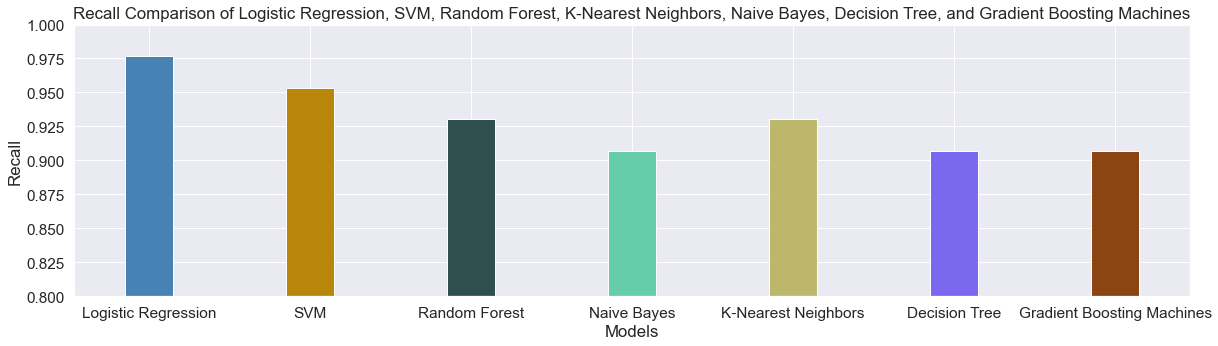

In [27]:
# Compare recalls
print("Recall for Logistic Regression:", recall_lr)
print("Recall for SVM:", recall_svm)
print("Recall for Random Forest:", recall_rf)
print("Recall for Naive Bayes:", recall_nb)
print("Recall for K-Nearest Neighbors:", recall_knn)
print("Recall for Decision Tree:", recall_dt)
print("Recall for Gradient Boosting Machines:", recall_gbm)

import matplotlib.pyplot as plt

# Recall comparison
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree', 'Gradient Boosting Machines']
recalls = [recall_lr, recall_svm, recall_rf, recall_nb, recall_knn, recall_dt, recall_gbm]

plt.figure(figsize=(20, 5))
plt.bar(models, recalls, color=['steelblue', 'darkgoldenrod', 'darkslategray', 'mediumaquamarine', 'darkkhaki', 'mediumslateblue', 'saddlebrown'], width=0.3)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison of Logistic Regression, SVM, Random Forest, K-Nearest Neighbors, Naive Bayes, Decision Tree, and Gradient Boosting Machines')
plt.ylim(0.80, 1.00)  # Set y-axis limit to range from 0 to 1
plt.show()


Recall for Logistic Regression: 0.9767441860465116
Recall for SVM: 0.9534883720930233
Recall for Random Forest: 0.9302325581395349
Recall for Naive Bayes: 0.9069767441860465
Recall for K-Nearest Neighbors: 0.9302325581395349
Recall for Decision Tree: 0.9069767441860465
Recall for Gradient Boosting Machines: 0.9069767441860465


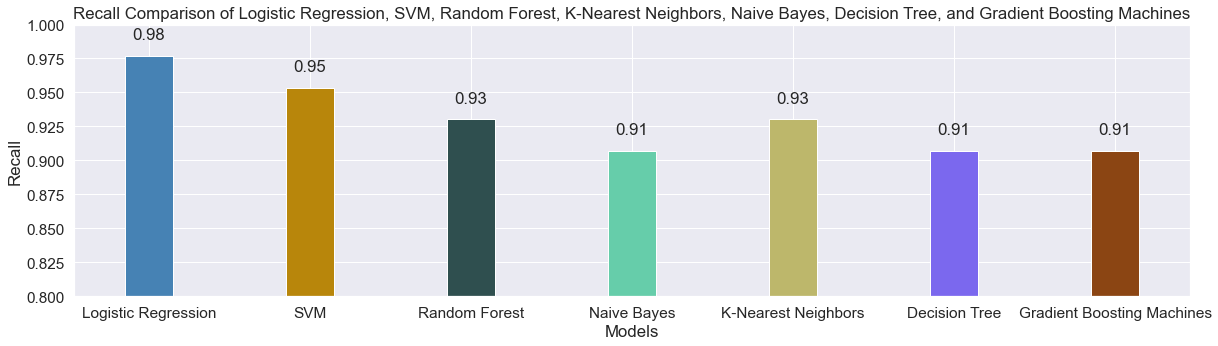

In [28]:
# Compare recalls
print("Recall for Logistic Regression:", recall_lr)
print("Recall for SVM:", recall_svm)
print("Recall for Random Forest:", recall_rf)
print("Recall for Naive Bayes:", recall_nb)
print("Recall for K-Nearest Neighbors:", recall_knn)
print("Recall for Decision Tree:", recall_dt)
print("Recall for Gradient Boosting Machines:", recall_gbm)

import matplotlib.pyplot as plt

# Recall comparison
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree', 'Gradient Boosting Machines']
recalls = [recall_lr, recall_svm, recall_rf, recall_nb, recall_knn, recall_dt, recall_gbm]

plt.figure(figsize=(20, 5))
bars = plt.bar(models, recalls, color=['steelblue', 'darkgoldenrod', 'darkslategray', 'mediumaquamarine', 'darkkhaki', 'mediumslateblue', 'saddlebrown'], width=0.3)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison of Logistic Regression, SVM, Random Forest, K-Nearest Neighbors, Naive Bayes, Decision Tree, and Gradient Boosting Machines')
plt.ylim(0.80, 1.00)  # Set y-axis limit to range from 0 to 1

# Add numbers on top of each bar
for bar, recall in zip(bars, recalls):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(recall, 2), ha='center', va='bottom')

plt.show()


F1 Score for Logistic Regression: 0.9767441860465116
F1 Score for SVM: 0.9647058823529412
F1 Score for Random Forest: 0.9523809523809524
F1 Score for Naive Bayes: 0.9397590361445783
F1 Score for K-Nearest Neighbors: 0.9302325581395349
F1 Score for Decision Tree: 0.896551724137931
F1 Score for Gradient Boosting Machines: 0.9285714285714286


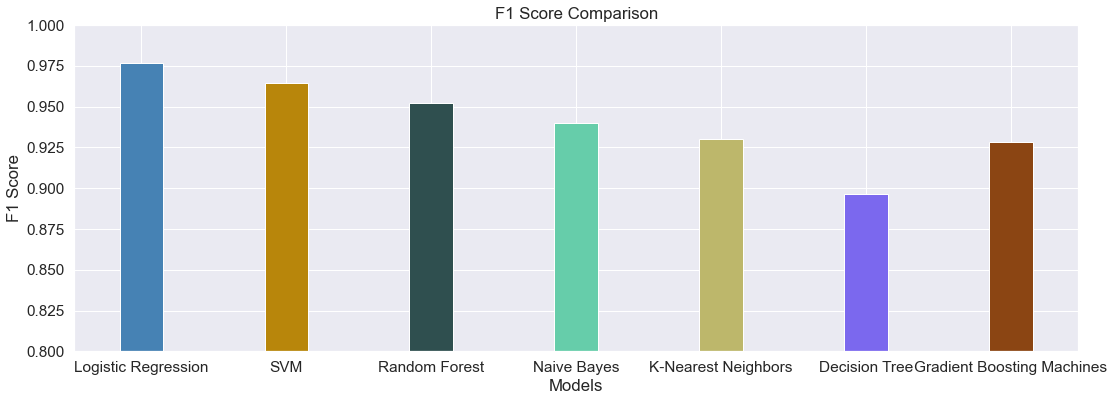

In [29]:
# Compare F1 scores
print("F1 Score for Logistic Regression:", f1_lr)
print("F1 Score for SVM:", f1_svm)
print("F1 Score for Random Forest:", f1_rf)
print("F1 Score for Naive Bayes:", f1_nb)
print("F1 Score for K-Nearest Neighbors:", f1_knn)
print("F1 Score for Decision Tree:", f1_dt)
print("F1 Score for Gradient Boosting Machines:", f1_gbm)

import matplotlib.pyplot as plt

# F1 score comparison
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree', 'Gradient Boosting Machines']
f1_scores = [f1_lr, f1_svm, f1_rf, f1_nb, f1_knn, f1_dt, f1_gbm]

plt.figure(figsize=(18, 6))
plt.bar(models, f1_scores, color=['steelblue', 'darkgoldenrod', 'darkslategray', 'mediumaquamarine', 'darkkhaki', 'mediumslateblue', 'saddlebrown'], width=0.30)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.ylim(0.80, 1.00)  # Set y-axis limit to range from 0 to 1
plt.show()


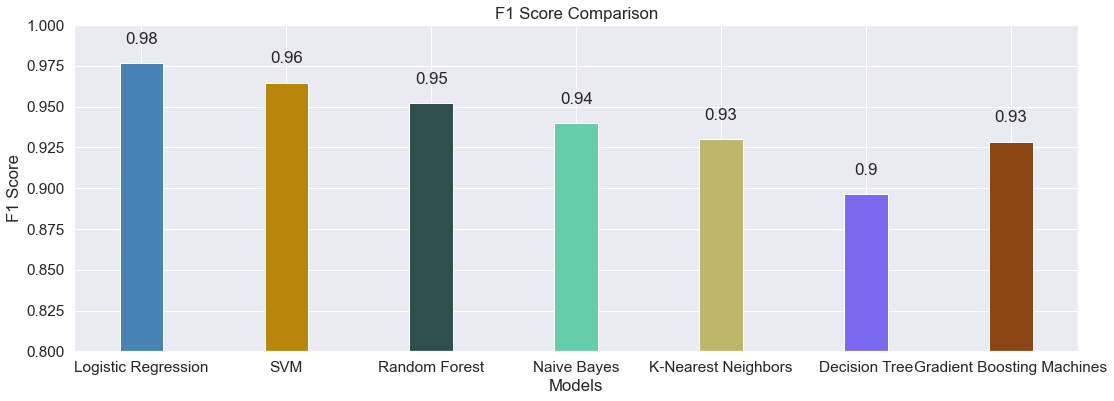

In [30]:
import matplotlib.pyplot as plt

# F1 score comparison
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree', 'Gradient Boosting Machines']
f1_scores = [f1_lr, f1_svm, f1_rf, f1_nb, f1_knn, f1_dt, f1_gbm]

plt.figure(figsize=(18, 6))
bars = plt.bar(models, f1_scores, color=['steelblue', 'darkgoldenrod', 'darkslategray', 'mediumaquamarine', 'darkkhaki', 'mediumslateblue', 'saddlebrown'], width=0.30)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.ylim(0.80, 1.00)  # Set y-axis limit to range from 0 to 1

# Add text labels on top of each bar
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(score, 2), ha='center', va='bottom')

plt.show()
